<font color='red'>No se aceptan soluciones que usen metodologías distintas a la vistas en clases.</font>

<font color='orange'>Se puede usar el código de los ejemplos vistos en clases.</font>



# 1) Ingrese su Nombre y Número de alumno/a

(1 Punto)

In [1]:
Nombre = 'Jessica Hormazabal' # Por ejemplo: 'Carmen Gloria Perez'
ID     = '15639150' # Por ejemplo: '12345678K'

# Se puede trabajar en grupo, pero la entrega es individual
Integrantes = [ID,'1234','567'] # Coloque aqui los integrantes del grupo si es que no trabajo de forma individual

print('IMPORTANTE: Cambie el nombre del archivo (arriba-izquierda) por '+ID+'.ipynb')

IMPORTANTE: Cambie el nombre del archivo (arriba-izquierda) por 15639150.ipynb


# 2) Importe las Librerías

(1 Punto)

*Todas las librerías de este código deben ir en esta celda. Sólo está permitido usar las librerías de los ejemplos vistos en clase.*



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import IPython
from scipy.io import wavfile
from scipy.fft import irfft
from scipy.fft import rfft, rfftfreq

# 3) Convolución 1D - Continua

(2 Puntos)

Encontrar $y(t) = x(t) * g(t)$ para la siguientes funciones. Asuma que las funciones $x(t)$ y $g(t)$ han sido muestreadas en $t$, de tal forma que $t_i = i/100 - 3$ para $i=0, 1, \cdots 600$, es decir $x_i = x(t_i)$, $g_i = g(t_i)$, $y_i = y(t_i)$. Debe graficar las tres funciones. 

Para resolver este problema, en un papel resuelva la convolución continua, luego grafique los resultados.




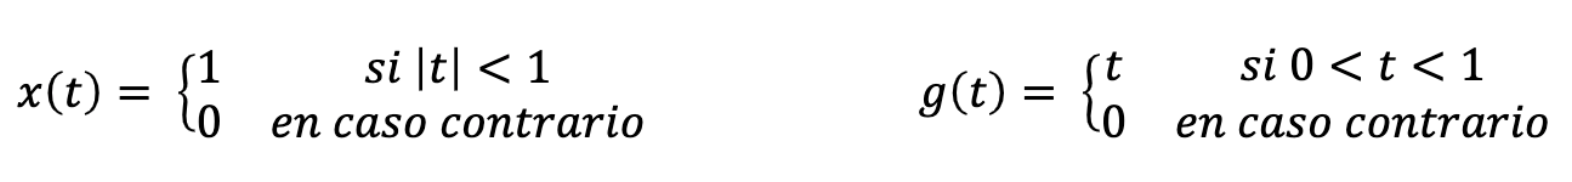

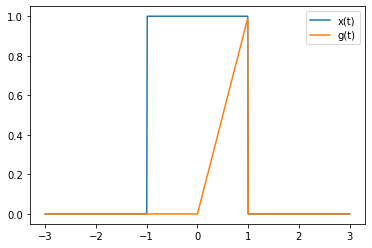

In [3]:
def x_func(t):
  if abs(t) < 1:
    return 1
  return 0

def g_func(t):
  if t > 0 and t < 1:
    return t
  return 0

X = [x_func(i/100 - 3) for i in range(601)]
G = [g_func(i/100 - 3) for i in range(601)]
eje = [i/100 - 3 for i in range(601)]
plt.plot(eje, X)
plt.plot(eje, G)
plt.legend(["x(t)", "g(t)"])
plt.show()

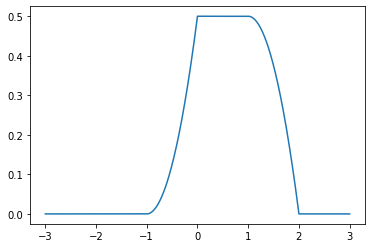

In [4]:
# Si movemos x(t) para convolucionarlo con g(t) entonces:
def y_func(t):
  if t <= -1 or t > 2: # No overlap en ambos lados -inf .. -1 y 2 .. inf 
    return 0 
  elif t > -1 and t <= 0: #Triangulo entrando -1 .. t
    return t**2 - t**2/2 + t + 1/2
  elif t > 0 and t <= 1: #Triangulo entero dentro 0 .. 1
    return 1/2
  elif t > 1 and t <= 2: #Triangulo saliendo 1 .. t
    return -(t**2 - 2*t)/2
Y = [y_func(i/100 - 3) for i in range(601)]
plt.plot(eje,Y)
plt.show()

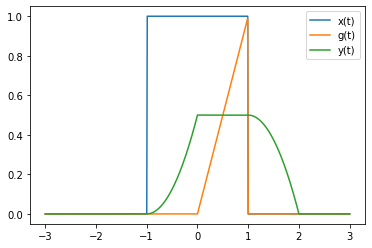

In [5]:
plt.plot(eje,X)
plt.plot(eje,G)
plt.plot(eje,Y)
plt.legend(["x(t)", "g(t)","y(t)"])
plt.show()

# 4) Convolución 1D - discreta
(1 Punto)

Realice la convolución discreta de las siguientes funciones:

Para resolver este problema puede usar la función de convolución discreta de Python.


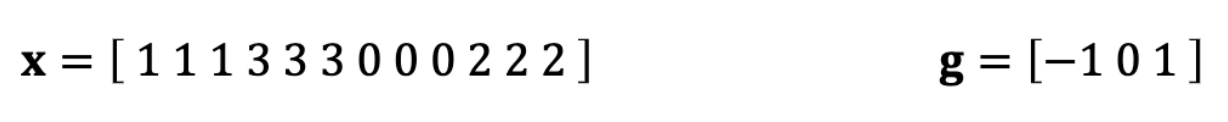

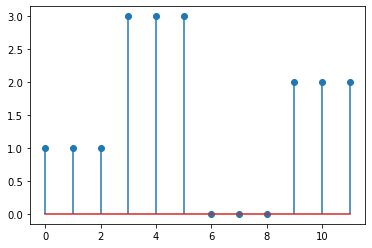

In [6]:
# Pulsos x
x = [1,1,1,3,3,3,0,0,0,2,2,2]
eje1 = np.arange(0, len(x))
plt.stem(eje1,x, use_line_collection=True)
plt.show()

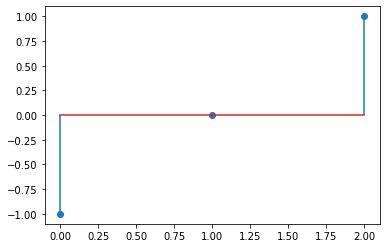

In [7]:
# Pulsos g
g = [-1,0,1]
eje2 = np.arange(0, len(g))
plt.stem(eje2,g, use_line_collection=True)
plt.show()

y = [-1  0 -2 -2  0  3  3  0 -2 -2  0  2]


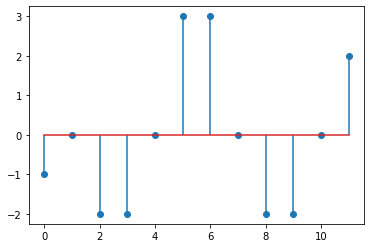

In [8]:
x = [1,1,1,3,3,3,0,0,0,2,2,2]
g = [-1,0,1]
y = np.convolve(x,g,'same')
print("y =",y)
eje3 = np.arange(0, len(y))
plt.stem(eje3,y, use_line_collection=True)
plt.show()

# 5.1) Separación de señales usando Fourier (Gong)

(8 puntos)

Usando la transformada de Fourier en 1D, a partir del sonido mezclado del gong con el canto del pájaro, produzca una señal de audio en que se escuche principalmente el gong. Use una función de audio para esuchar esta señal.

El archivo `wav` del sonido mezclado se encuentra en `https://www.dropbox.com/s/9qbeuw8wm0qc4f1/gongbird.wav`

<font color='red'> *Este problema puede ser resuelto usando el ejemplo simple visto en clases (no es necesario usar ninguna de las funciones de los ejemplos 'avanzados').*

En la solución debe incluir:

* la gráfica de la señal original y filtrada en el dominio del tiempo

* la gráfica de la señal original y filtrada  en el dominio de la frecuencia

* audio de la señal  original y filtrada 

In [9]:
!wget https://www.dropbox.com/s/9qbeuw8wm0qc4f1/gongbird.wav

--2021-09-23 16:00:51--  https://www.dropbox.com/s/9qbeuw8wm0qc4f1/gongbird.wav
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9qbeuw8wm0qc4f1/gongbird.wav [following]
--2021-09-23 16:00:51--  https://www.dropbox.com/s/raw/9qbeuw8wm0qc4f1/gongbird.wav
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf498c31be9ebfe7195f21cb47e.dl.dropboxusercontent.com/cd/0/inline/BWvxB_9zqju3Ya3EQ6hl9F8iQkbJYKjU9WT_rdCaKV9AHlpmDDayckWc8rm_HoYe2XYiWpAA-pOE5jP0UFFasKinxn2vItYyW-gtZ9y4RfmVG4pxoHwVgUAYoz6VY7ypxS87UJK35g3MBZPc8Aqq22xG/file# [following]
--2021-09-23 16:00:51--  https://ucf498c31be9ebfe7195f21cb47e.dl.dropboxusercontent.com/cd/0/inline/BWvxB_9zqju3Ya3EQ6hl9F8iQkbJYKjU9WT_rdCaKV9AHlpmDDayckWc8rm_HoYe2XYiWpAA-pOE5jP0UFFasKinx

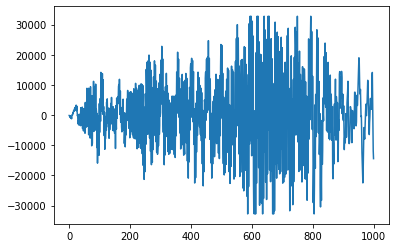

In [10]:
# Audio original
SAMPLE_RATE, y_original = wavfile.read('gongbird.wav')
plt.plot(y_original[:1000])
plt.show()

In [11]:
IPython.display.Audio('gongbird.wav')

Caos, ahora intenemos pasarlo al dominio de la frecuencia


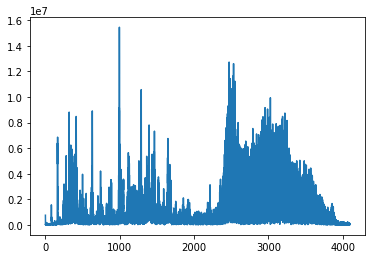

In [21]:

N = len(y_original) # = SAMPLE_RATE * DURATION
# Para inputs reales, más optimizado y, a diferencia de su contraparte sin r (fft) solo nos da la mitad de la gráfica
ryf = rfft(y_original)
rxf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(rxf, np.abs(ryf))
plt.show()

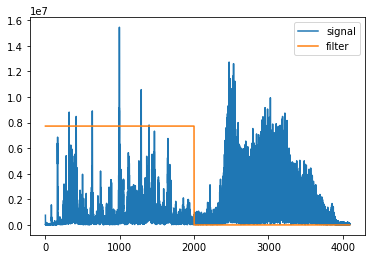

In [20]:
# Filtrado
# The maximum frequency is half the sample rate
points_per_freq = len(rxf) / (SAMPLE_RATE / 2)

# Our target frequency is 4000 Hz
target_idx = int(points_per_freq * 2000)

ryf_abs = np.abs(ryf)

plt.plot(rxf,ryf_abs)

hf = np.ones((len(rxf),))
hf[target_idx:] = 0
plt.plot(rxf, hf*np.max(ryf_abs)/2)
plt.legend(['signal','filter'])
plt.show()


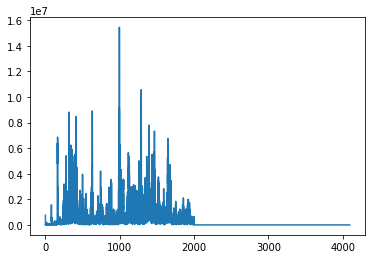

In [14]:
# Filtering
yff = np.multiply(ryf,hf)
plt.plot(rxf, np.abs(yff))
plt.show()

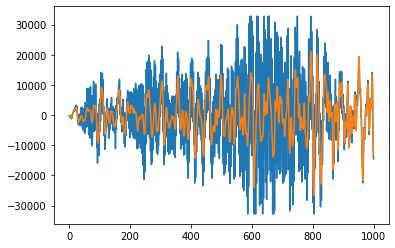

In [15]:
y_filtered_real = irfft(yff).real
y_filtered      = y_filtered_real.astype(np.int16)

plt.plot(y_original[:1000])
plt.plot(y_filtered[:1000])
plt.show()

In [16]:
wavfile.write("filtered.wav", SAMPLE_RATE, y_filtered)

In [17]:
IPython.display.Audio('filtered.wav')

# 5.2) Separación de señales usando Fourier (Canto del Pájaro)

(2 puntos)

A partir del resultado de la pregunta anterior, produzca una señal de audio en que se escuche principalmente el canto del pájaro.



In [18]:
y_pajaro = y_original - y_filtered
wavfile.write("filtered.wav", SAMPLE_RATE, y_pajaro)


In [19]:
IPython.display.Audio('filtered.wav')

# <font color='red'>SUBIR EJERCICIO DE FORMA INDIVIDUAL A GOOGLE CLASSROOM</font> 

<font color='orange'>(subir archivo NumeroAlumnx.ipynb) </font>

# (Class code: khcdh57) 
